课程重点
1. 理解判断矩阵和一致性矩阵的概念与关系
2. 掌握通过判断矩阵确定权重的三种方法
3. 掌握评价类模型的基本步骤和流程

# 评价类模型
## 引入
学姐想买一台新电脑，备选方案有：联想拯救者、联想小新轻薄本、MacBook Air，购买电脑的考虑因素有：价位、性能、便携程度、续航、屏幕显示。那么学姐应该如何选择呢？

问题分析：选择方案 —— 属于评价类问题

解决评价类问题需要思考的三个问题：
1. 评价目标是什么？ —— 购买电脑
2. 为了达到目标有哪几种可选方案？—— 联想拯救者、联想小新轻薄本、MacBook Air
3. 评价的准则/指标是什么？ ——价位、性能、便携程度、续航、屏幕显示

最简单的方法：做一个权重表吧！
![alt text](image.png)
- 同颜色的单元格和为1，表示针对某一因素所占的权重
- 直接写出权重

直接写权重出现的问题：

司守奎《数学建模算法与应用》：在确定影响某因素的诸因子在该因素中所占的比重时，遇到的主要困难是这些比重常常**不易定量化**。此外，当影响某因素的因子**较多**时，直接顾此考虑各因子对该因素有多大程度的影响时，常常会因考虑不周全、失彼而使决策者提出与他实际认为的重要性程度**不相一致**的数据，甚至有可能提出一组隐含矛盾的数据。
- 什么是不相一致？如果一次性考虑五个指标之间的权重，往往会考虑不周到，忽略了方案之间的差异

解决方法：比较+划分 —— 层次分析法的核心思想，也是数模中最常用的一种主观权重确定方法

## 主观权重确定 —— 判断矩阵法（层次分析法）
从购买电脑的角度，学姐对价位、性能、便携程度、续航、屏幕显示这五个指标按照下面的标准进行**两两比较**
![alt text](image-2.png)

得到了如下的一个矩阵（方阵）：
![alt text](image-1.png)

在这个过程中，学姐进行了10次比较，组合数C(5,2)=10, 分别是：
- 我觉得价位强烈不如性能重要
- 我觉得价位稍微不如便携程度重要一点
- 我觉得价位不太强烈重要于续航
- 我觉得价位比屏幕显示稍微重要一点
- 我觉得性能比便携程度稍微重要
- 我觉得性能比续航稍微重要
- 我觉得性能比屏幕显示明显重要
- 我觉得便携程度不如续航那么明显重要
- 我觉得便携程度比屏幕显示更明显重要
- 我觉得续航比屏幕显示极端重要

上表的数据构成的方阵就是**判断矩阵**，理论上，这个表需要**专家**去写，但比赛中，专家往往就是自己

### 判断矩阵及性质
![alt text](image-4.png)
矩阵中元素的具体含义是

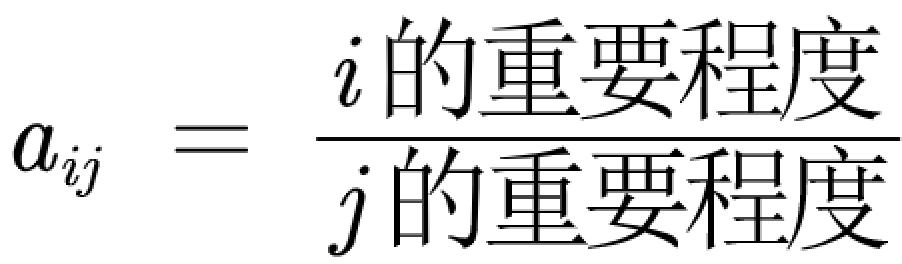

得到判断矩阵后，学姐迫不及待的想去算权重了，但是等一等，别忘了当初构造判断矩阵的原因——保证一致性！这在指标数量特别多的时候更为重要。可以直观理解不一致
![alt text](image-3.png)
- 从性能角度看，屏幕显示应该比价位重要，但是直接比较价位和屏幕显示的时候却发现，价位比屏幕显示重要？
- 从性能角度看，便携程度和续航应该一样重要，但是直接比较便携程度和续航，发现续航比便携程度重要？如果把4改成5、6，不一致性会更严重
- 一致性问题是在两两比较中，不可避免会出现的问题，那么就需要一种方法来判断“专家”得到的判断矩阵是否一致

### 一致矩阵及其判定
#### 定义及性质
![alt text](image-5.png)
![alt text](image-6.png)
**需要注意**：一致性矩阵中出现了 3/4 和 4/3两个元素，但是根据之前给出的层次分析法的比较标准，这是不允许出现在判断矩阵中的，判断矩阵中的原序只能是1至9以及倒数。

#### 一致性检验原理
1. 原理：检验构造的判断矩阵和一直矩阵是否有太大差别
2. 数学证明（可以忽略，建模中都直接拿来用了，因此不过多讲解，看看就行，比赛也不用写出来）
![alt text](image-7.png)
![alt text](image-8.png)

#### 一致性检验步骤（重要）
![alt text](image-9.png)
一些小问题
1. 平均随机一致性指标 RI 如何计算得到的？
![alt text](image-11.png)
2. 为什么要像上述构造CI，为什么以0.1为划分依据？

答：作者通过多次实验试出来的，即“蒙特卡罗模拟”

In [1]:
# 判断所给的 判断矩阵 是否是一致性矩阵(cr < 0.1)
import numpy as np

def is_consistent_matrix(matrix):
    # 判断矩阵维度
    if matrix.shape[0] != matrix.shape[1]:
        print("The matrix is not square!")
        return False
    
    # 获取矩阵维度
    n = matrix.shape[0]
    # 计算矩阵的最大特征值
    eigen_values, _ = np.linalg.eig(matrix)
    max_eigen_value = np.max(eigen_values)
    # max_eigen_vector = eigen_vectors[:, np.argmax(eigen_values)] # 获取最大特征值对应的特征向量

    # 计算一致性指标 CI （Consistency Index）
    ci = (max_eigen_value - n) / (n - 1)

    # 随机一致性指标表 RI （Random Index）
    ri_values = {
        1: 0.00,
        2: 0.00,
        3: 0.52,
        4: 0.89,
        5: 1.12,
        6: 1.26,
        7: 1.36,
        8: 1.41,
        9: 1.46,
        10: 1.49,
        11: 1.52,
        12: 1.54,
        13: 1.56,
        14: 1.58,
        15: 1.59
    }
    ri = ri_values[n]

    # 计算一致性比率 CR （Consistency Ratio）
    cr = ci / ri

    return cr < 0.1, cr

In [2]:
# 原始矩阵
matrix = np.array([
    [1, 1/7, 1/4, 1/6, 2],
    [7, 1, 3, 3, 5],
    [4, 1/3, 1, 1/4, 6],
    [6, 1/3, 4, 1, 8],
    [1/2, 1/5, 1/6, 1/8, 1]
])
is_consistent_matrix(matrix)

(False, (0.10036434427105571+0j))

In [3]:
matrix = np.array([
    [1, 1/7, 1/4, 1/6, 2],
    [7, 1, 3, 3, 5],
    [4, 1/3, 1, 1/4, 6],
    [6, 1/3, 4, 1, 8],
    [1/2, 1/5, 1/6, 1/8, 1]
])
n = matrix.shape[0]
eigen_values, vec = np.linalg.eig(matrix)
Ci = (np.max(np.real(eigen_values)) - n) / (n-1)
vec.shape

(5, 5)

In [4]:
# 修正后
matrix = np.array([
    [1, 1/5, 1/4, 1/6, 2],
    [5, 1, 3, 3, 7],
    [4, 1/3, 1, 1/4, 6],
    [6, 1/3, 4, 1, 8],
    [1/2, 1/7, 1/6, 1/8, 1]
])
is_consistent_matrix(matrix)

(True, (0.08650099324698532+0j))

### 层次分析（判断矩阵）求主观权重
#### 步骤
1. 写出判断矩阵（方阵）
2. 进行一致性检验
3. 求权重：算数平均、几何平均、特征向量

#### 方法1: 算术平均法
- 公式

![alt text](image-12.png)
- Excel实现

![alt text](image-13.png)
- Python实现

In [5]:
def AHP_weight1(matrix):
    # 5*5
    # step 1
    a = matrix / np.sum(matrix, axis=0)
    print(f"Step1: {a}")
    # step 2
    b = np.sum(a, axis=1)
    print(f"Step2: {b}")
    # step 3
    w = b / np.sum(b)
    return w

AHP_weight1(matrix)

Step1: [[0.06060606 0.09952607 0.02970297 0.03669725 0.08333333]
 [0.3030303  0.49763033 0.35643564 0.66055046 0.29166667]
 [0.24242424 0.16587678 0.11881188 0.05504587 0.25      ]
 [0.36363636 0.16587678 0.47524752 0.22018349 0.33333333]
 [0.03030303 0.07109005 0.01980198 0.02752294 0.04166667]]
Step2: [0.30986568 2.1093134  0.83215877 1.55827749 0.19038466]


array([0.06197314, 0.42186268, 0.16643175, 0.3116555 , 0.03807693])

In [ ]:
temp = np.sum(matrix, axis=0)
# print(matrix.shape, temp.shape)
a = matrix / temp
b = np.sum(a, axis=1)
w = b / np.sum(b)
w

array([0.06197314, 0.42186268, 0.16643175, 0.3116555 , 0.03807693])

#### 方法2: 几何平均法
- 公式

![alt text](image-14.png)
- Excel实现

![alt text](image-15.png)
- Python实现

In [31]:
def AHP_weight2(matrix):
    n = matrix.shape[0]
    # step 1
    a = np.prod(matrix, axis=1)
    print(f"Step1: {a}")
    # step 2
    b = np.power(a, 1/n)
    print(f"Step2: {b}")
    # step 3
    w = b / np.sum(b)
    return w

AHP_weight2(matrix)

Step1: [1.66666667e-02 3.15000000e+02 2.00000000e+00 6.40000000e+01
 1.48809524e-03]
Step2: [0.4409301  3.15981831 1.14869835 2.29739671 0.27197322]


array([0.06024609, 0.43173896, 0.15695138, 0.31390275, 0.03716082])

In [30]:
n = matrix.shape[0]
a = np.prod(matrix, axis=1)
b = np.power(a, 1/n)
w = b / np.sum(b)
w

array([0.06024609, 0.43173896, 0.15695138, 0.31390275, 0.03716082])

#### 方法3: 特征值法
- 原理

![alt text](image-16.png)

- Python实现

In [37]:
def AHP_weight3(matrix):
    n = matrix.shape[0]
    # step 1
    eigen_values, eigen_vector = np.linalg.eig(matrix)
    a = eigen_vector[:, np.argmax(eigen_values)]
    print(f"Step1: {a}")
    # step 2
    w = a / np.sum(a)
    return w

AHP_weight3(matrix)

Step1: [0.10048284+0.j 0.77801909+0.j 0.26825645+0.j 0.55559326+0.j
 0.06280206+0.j]


array([0.05692583+0.j, 0.44076563+0.j, 0.15197342+0.j, 0.31475631+0.j,
       0.03557881+0.j])

In [36]:
n = matrix.shape[0]
eig_v, eig_vect = np.linalg.eig(matrix)
idx = np.argmax(eig_v)
print(eig_vect[:, idx])
eig_vect


[0.10048284+0.j 0.77801909+0.j 0.26825645+0.j 0.55559326+0.j
 0.06280206+0.j]


array([[ 0.10048284+0.j        , -0.03078488-0.05551022j,
        -0.03078488+0.05551022j, -0.19233667+0.j        ,
        -0.0106399 +0.j        ],
       [ 0.77801909+0.j        ,  0.80565032+0.j        ,
         0.80565032-0.j        , -0.90645595+0.j        ,
        -0.87398677+0.j        ],
       [ 0.26825645+0.j        , -0.22044704+0.04172428j,
        -0.22044704-0.04172428j, -0.0862471 +0.j        ,
        -0.22459258+0.j        ],
       [ 0.55559326+0.j        ,  0.00361689+0.54267302j,
         0.00361689-0.54267302j,  0.3179046 +0.j        ,
         0.42186243+0.j        ],
       [ 0.06280206+0.j        ,  0.00174187-0.04528273j,
         0.00174187+0.04528273j,  0.18122452+0.j        ,
         0.08731653+0.j        ]])

关于三种权重
- 科研中：没有太大差别，可以随便选一种用，写清楚即可，当然也可以用平均
- 比赛中：建议将三种方法（算数平均法，几何平均法，特征值法）求出的权重进行再进行平均，以增加权重稳健性质

In [38]:
weight = (AHP_weight1(matrix) + AHP_weight2(matrix) + np.real(AHP_weight3(matrix))) / 3
weight

Step1: [[0.06060606 0.09952607 0.02970297 0.03669725 0.08333333]
 [0.3030303  0.49763033 0.35643564 0.66055046 0.29166667]
 [0.24242424 0.16587678 0.11881188 0.05504587 0.25      ]
 [0.36363636 0.16587678 0.47524752 0.22018349 0.33333333]
 [0.03030303 0.07109005 0.01980198 0.02752294 0.04166667]]
Step2: [0.30986568 2.1093134  0.83215877 1.55827749 0.19038466]
Step1: [1.66666667e-02 3.15000000e+02 2.00000000e+00 6.40000000e+01
 1.48809524e-03]
Step2: [0.4409301  3.15981831 1.14869835 2.29739671 0.27197322]
Step1: [0.10048284+0.j 0.77801909+0.j 0.26825645+0.j 0.55559326+0.j
 0.06280206+0.j]


array([0.05971502, 0.43145576, 0.15845218, 0.31343819, 0.03693885])

## 层次分析法（Analytic Hierarchy Process，AHP）

仿照着上面的步骤，我们可以继续看，在性能最优（Criterion）的情况下，三种计算机（Plan）哪个权重高呢？这就是层次分析法，即在C-P中用权重代替了打分。而我们的思路其实可以拆解为层次分析图：目标层（Objective）准则层（Criterion）方案层（Plan）

### 层次分析步骤
1. 分析系统中各因素关系，建立系统的递阶层次结构图
![alt text](image-17.png)
> 需要注意的是，如果只是求权重，那么指标体系图是树状图，如果是用权重代替了打分，那么是上面那种画法，之所以将求权重和评价分开，因为大多数时候用层次分析求权重多。

2. 构造判断矩阵
目标-准则之间的矩阵叫 O-C，准则-方案之间的矩阵叫 C-P，而准则-方案层判断矩阵的数据既可以自己写（像O-C那样），也可以融合现有的数据

3. 一致性检验并计算权重
4. 根据权重计算得分（利用打分表）
![alt text](image-18.png)


对于步骤二进行一个解释：比如还是买电脑，但是学姐知道拯救者、联想小新和Mac的价位分别是：9000RMB，5000RMB，12000RMB，那么就可以直接在价位指标写入该数值，同理，续航三者分别是：6h、12h和24h，便携程度用重量代表，分别是1.5kg、0.8kg和0.3kg。

但是对于性能、屏幕显示就不那么好量化，这里也有很多量化的方法，构造C-P矩阵，通过权重代表得分是其中一种，我们对性能进行量化，进行一致性检验，得到权重。
![alt text](image-20.png)

In [39]:
matrix = np.array([
    [1, 4, 1/2],
    [1/4, 1, 1/6],
    [2, 6, 1],
])
is_consistent_matrix(matrix)

(True, (0.008848762225266853+0j))

In [40]:
# 为了计算方便没有封装成函数
a = matrix / matrix.sum(axis=0)
b = a.sum(axis=1)
w2 = b / b.sum()
w2

array([0.32377622, 0.08927739, 0.58694639])

对于屏幕显示，我们仍旧采用最初的主观打分，最后汇总得到打分表：
![alt text](image-19.png)

区分指标体系图和层次分析结构图

In [ ]:
# 现在我们的权重矩阵是weight，而分数矩阵是X
X = np.array([
    [9000, 5000, 12000],
    [0.324, 0.089, 0.587],
    [1.5, 0.8, 0.3],
    [6, 12, 24],
    [0.15, 0.15, 0.7]
])
# 判断矩阵的维度
weight.shape, X.shape 

((5,), (5, 3))

In [42]:
np.matmul(X.T, weight)

array([539.69881665, 302.50705857, 724.42940954])

In [16]:
scores = np.matmul(X.T, weight)
scores

array([539.69881665, 302.50705857, 724.42940954])

根据结果发现，还是Mac的得分最高（724），所以选择Mac

思考：评价过程有没有什么问题？

## 评价类模型常见问题
- 考虑量纲影响：价格数量级远远大于性能数量级，最后的得分，尽管性能的权重大，但还是价格占主导地位
- 正向化：便携程度用重量衡量，应该是越小越好

### 评价模型建模流程
1. 确定评价目标、评价对象
2. 建立指标体系（评价准则）
3. 寻找数据，量化评价指标
4. 确定权重 (和为1)
5. 数据归一化，正向化
6. 选择评价方法，计算评价分数

穿插讲解 MatrixEDA